**Ход исследования**:
1. Обзор и подготовка данных к анализу.
2. Приоритизация гипотез.
3. Анализ А/В теста.
4. Принятие решения по результатам теста.

## Обзор и подготовка данных к анализу

In [1]:
# импорт библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# чтение файлов с данными
data, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  
    pd.read_csv('/datasets/orders.csv'), 
    pd.read_csv('/datasets/visitors.csv'), 
)

# просмотр файлов с данными
print('Файл hypothesis:')
display(data)
print('Файл orders:')
display(orders.head(5))
print(orders.info())
print('\nФайл visitors:')
display(visitors.head(5))
print(visitors.info())

Файл hypothesis:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Файл orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Файл visitors:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Переименуем столбцы в `data`.

In [3]:
# переименование столбцов
data.columns = data.columns.str.lower()

Преобразуем типы данных о времени.

In [4]:
# преобразование типов данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим отсутствие дубликатов в `orders` и `visitors`.

In [5]:
print('Кол-во дубликатов в orders:', orders.duplicated().sum())
print('Кол-во дубликатов в visitors:', visitors.duplicated().sum())

Кол-во дубликатов в orders: 0
Кол-во дубликатов в visitors: 0


**Выводы**

Рассмотрены данные, произведена подготовка данных:
* выявлено отсутствие пропусков в данных;
* названия столбцов в `data` (данные с файла `hypothesis`) приведены в нижний регистр; 
* преобразованы типы данных о времени в `orders` и `visitors`;
* произведена проверка на отсутствие дубликатов в `orders` и `visitors`. 

## Приоритизация гипотез

Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['ICE'] = round((data['impact'] * data['confidence'] / data['efforts']), 1)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Выведем полное описание двух наиболее перспективных гипотез по методу `ICE`. 

In [7]:
print(data.loc[8, 'hypothesis'])
print(data.loc[0, 'hypothesis'])

Запустить акцию, дающую скидку на товар в день рождения
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Выведем полное описание двух наиболее перспективных гипотез по методу `RICE`. 

In [9]:
print(data.loc[7, 'hypothesis'])
print(data.loc[2, 'hypothesis'])

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа


**Выводы**

Посчитаны `ICE` и `RICE` для гипотез - при применении RICE вместо ICE наиболее перспективной ввиду максимального охвата (*Reach равен 10*) оказалась гипотеза 7 - "***Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок***", в то время как по методу ICE на первом месте была гипотеза 8 - "*Запустить акцию, дающую скидку на товар в день рождения*" (*Reach равен 1, по методу RICE - 5 место*). 

Также перспективной по методу RICE оказалась гипотеза 2 - "***Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа***", которая по методу ICE была лишь на 5-м месте (*Reach равен 8*).  
Находящаяся на 2-м месте по методу ICE гипотеза 0 - "*Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*", из-за того, что затрагивает небольшое количество пользователей (*Reach равен 3*), по методу RICE оказалась на 3-м месте.

## Анализ А/В-теста

Рассмотрим данные таблицы заказов `orders` и определим:
1. Количество сделавших заказ пользователей в группе А и в группе В;
2. Наличие пользователей, попавших и в группу А и в группу В.

In [10]:
# определим количество пользователей 
print('Общее количество пользователей:', orders['visitorId'].nunique())
orders.groupby('group').agg({'visitorId':'nunique'})

Общее количество пользователей: 1031


,visitorId
group,
A,503
B,586


Общее количество пользователей и суммарное количество пользователей в разбивке по группам не совпадает, следовательно, есть пользователи, которые попали в обе группы.  
Определим пользователей, попавших и в группу А и в группу В, и исключим данных пользователей.

In [11]:
users_to_del = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group == 2')
print('Количество пользователей, попавших в обе группы:', len(users_to_del))

# исключим пользователей, попавших в обе группы
orders = orders.query('visitorId not in @users_to_del.index')

Количество пользователей, попавших в обе группы: 58


Повторно рассмотрим количество сделавших заказ пользователей в разбивке по группам.

In [12]:
print('Общее количество пользователей:', orders['visitorId'].nunique())
orders.groupby('group').agg({'visitorId':'nunique'})

Общее количество пользователей: 973


,visitorId
group,
A,445
B,528


Для построения графиков соберем **кумулятивные данные.**

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### График кумулятивной выручки по группам

Построим графики кумулятивной выручки по дням в разбивке по группам.

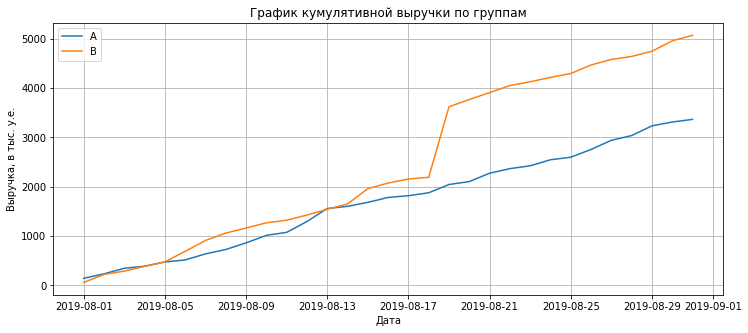

In [14]:
plt.figure(figsize=(12, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/1000, label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/1000, label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка, в тыс. у.е.')
plt.title('График кумулятивной выручки по группам')
plt.grid(True)
plt.legend();

**Выводы**

После 17 августа по группе В наблюдается резкий рост, что свидетельствует о влиянии аномально больших заказов.

### График кумулятивного среднего чека по группам

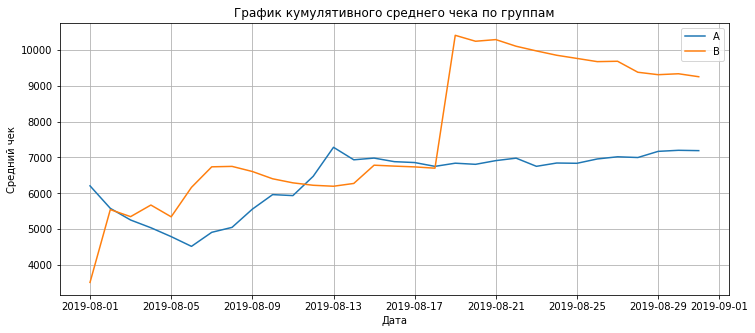

In [15]:
plt.figure(figsize=(12, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.grid(True)
plt.legend();

**Выводы**

На этом графике также заметно существенное влияние аномально больших заказов по группе В.

### График относительного изменения кумулятивного среднего чека группы В к группе А

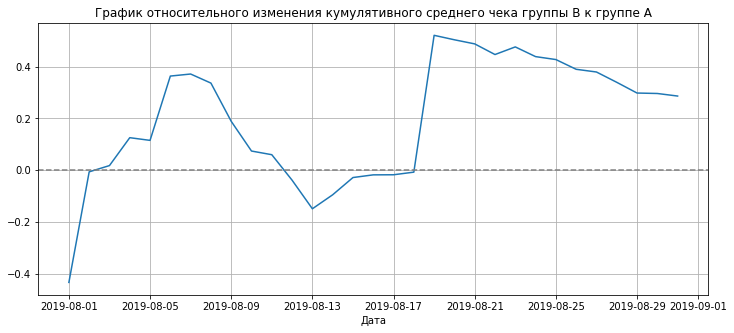

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.grid(True)

# добавляем ось X
plt.axhline(y=0, color='grey', linestyle='--');

**Выводы**

Вследствие теж же аномальных заказов по группе В присутствуют резкие скачки графика относительного изменения кумулятивного среднего чека группы В к группе А.

### График кумулятивной конверсии по группам

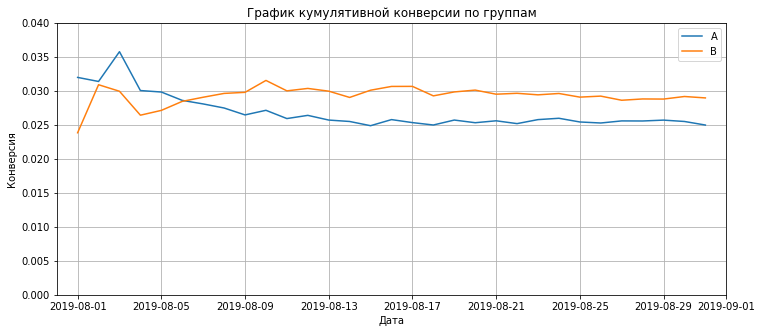

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0, 0.04])

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия');

**Выводы**

Кумулятивная конверсия группы В выровнялась на уровне около 3%, в то время как конверсия группы А к концу теста составила примерно 2,5%.

### График относительного изменения кумулятивной конверсии группы B к группе A

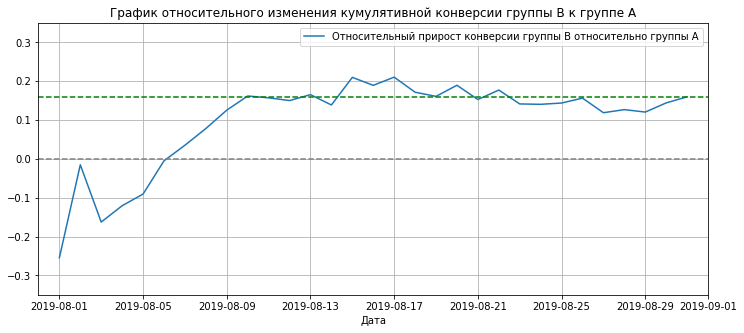

In [18]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.16, color='green', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.35, 0.35])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата');

**Выводы**

В начале теста конверсия группы В была меньше конверсии группы А, но затем быстро перегнав, установилась около прироста в 16% относительно группы А. 

### Точечный график количества заказов по пользователям

In [19]:
# подсчитаем количество заказов по пользователям
orders_by_users = (orders.groupby('visitorId', as_index=False)
                 .agg({'transactionId':'nunique'}))
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head()

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


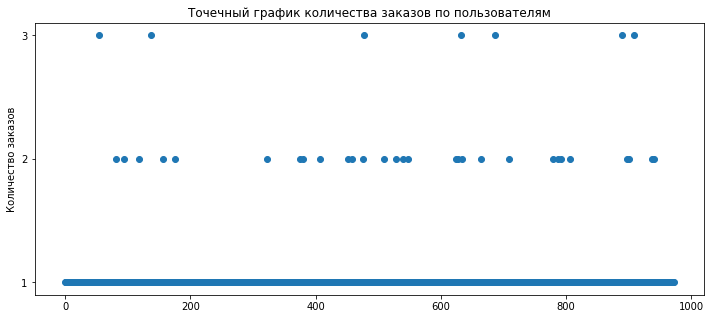

In [20]:
# строим точечный график
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(12, 5))
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.scatter(x_values, orders_by_users['orders'])
plt.yticks(np.arange(min(orders_by_users['orders']), max(orders_by_users['orders'])+1, 1));

**Выводы**

Есть совсем мало пользователей, сделавших 3 заказа, и небольшое количество пользователей с 2-мя заказами.

### Определение 95-й и 99-й перцентилей количества заказов на пользователя

In [21]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


**Выводы**

Не более 5% пользователей совершили больше 1 заказа (2 или 3 заказа) и не более 1% заказывали 3 раза.  
Примем за аномальных пользователей тех, кто совершил 3 заказа. 

### Точечный график стоимостей заказов

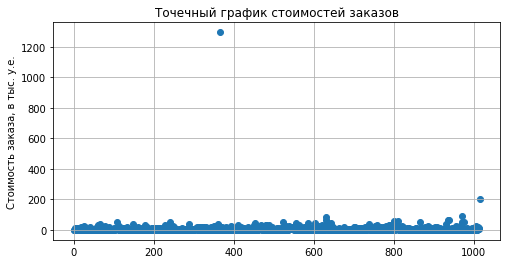

In [22]:
# строим точечный график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(8, 4))
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа, в тыс. у.е.')
plt.grid(True)
plt.scatter(x_values, orders['revenue']/1000);

Для информативности повторно построим график с исключением аномально большого заказа (более 1 млн. у.е.), приняв верхнюю границу в 250 тыс. у.е.

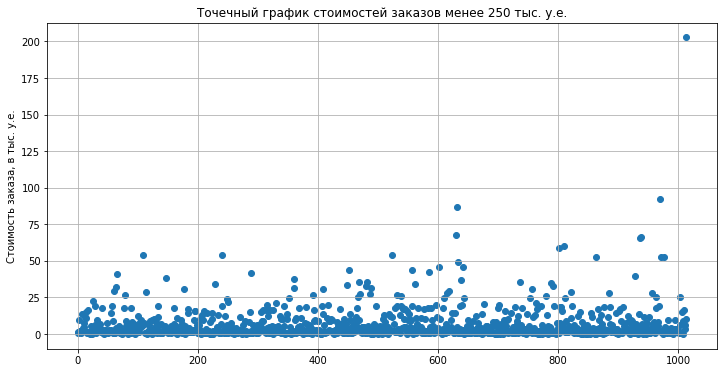

In [23]:
# строим точечный график для заказов стоимостью менее 1 млн. у.е.
x_values = pd.Series(range(0, len(orders.query('revenue < 250000')['revenue'])))
plt.figure(figsize=(12, 6))
plt.title('Точечный график стоимостей заказов менее 250 тыс. у.е.')
plt.ylabel('Стоимость заказа, в тыс. у.е.')
plt.grid(True)
plt.scatter(x_values, orders.query('revenue < 250000')['revenue']/1000);

**Выводы**

Помимо аномально большого заказа стоимостью более 1 млн. у.е., есть выбросы в районе 50 - 250 тыс. у.е.

### Определение 95-й и 99-й перцентилей стоимости заказов

In [24]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Выводы**

Не более 5 % заказов дороже 26 785 у.е. и не более 1 % дороже 53 904 у.е.  
Выберем границу для определения аномальных заказов как - заказы дороже 53 904 у.е.

### Определение статистической значимости различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы: 
 - Нулевая: различий в среднем количестве заказов между группами нет;
 - Альтернативная: различия в среднем между группами есть.

Подготовим данные.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Объявим переменные c данными о конверсии (количества заказов) по группам.  
Посчитаем статистическую значимость различия средней конверсии между группами применив тест Манна-Уитни.

In [26]:
# объявим переменные с данными 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sample_a = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("Относительный прирост среднего количества заказов группы В: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011
Относительный прирост среднего количества заказов группы В: 0.160


**Выводы**

По "сырым" данным есть статистически значимые различия, относительный прирост среднего количества заказов группы В к конверсии группы А равен 16 %. 

### Определение статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы: 
 - Нулевая: различий в среднем чеке между группами нет;
 - Альтернативная: различия в среднем чеке между группами есть.
 
Посчитаем статистическую значимость различия в среднем чеке между группами по "сырым" данным применив тест Манна-Уитни.

In [27]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()\
                       /orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный прирост среднего чека группы В: 0.287


**Выводы**

Статистически значимых различий в среднем чеке между группами нет, но средний чек группы В значительно больше среднего чека группы А. 

### Определение статистической значимости различий в конверсии между группами по «очищенным» данным

Произведем "очистку" данных от аномалий.

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormalUsers.shape[0])
abnormalUsers.head(5).to_frame()

Количество аномальных пользователей: 16


,0
1099,148427295
33,249864742
58,611059232
949,887908475
744,888512513


Подготовим "очищенные данные" и посчитаем статистическую значимость различий в среднем количестве заказов между группами теста с применением критерия Манна-Уитни.

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов группы В: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
Относительный прирост среднего количества заказов группы В: 0.189


### Определение статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различия в среднем чеке между группами по "очищенным" данным применив тест Манна-Уитни.

In [30]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы В: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.788
Относительный прирост среднего чека группы В: -0.032


**Выводы**

По "очищенным" данным статистически значимых различий в среднем чеке между группами по-прежнему нет, но из-за исключения выбросов с аномально дорогими заказами относительный средний чек группы В почти приравнялся со средним чеком группы А. 

## Принятие решения по результатам теста

Повторно построим графики относительного изменения кумулятивного среднего чека и относительного изменения кумулятивной конверсии группы В к группе А, предварительно подготовив "очищенные" данные.

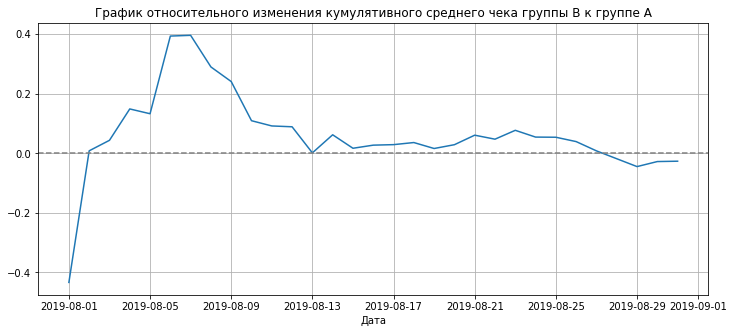

In [31]:
orders = orders.query('index not in @abnormalUsers.index')

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(12, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.grid(True)

# добавляем ось X
plt.axhline(y=0, color='grey', linestyle='--');

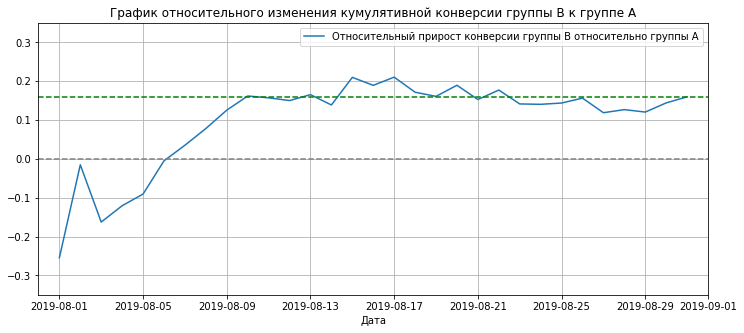

In [32]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=0.16, color='green', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.35, 0.35])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата');

Результаты теста:
* Нет статистически значимого различия по среднему чеку между группами ни по "сырым" (группа В +28,7%), ни по данным после фильтрации аномалий (группа В -3%);
* Есть статистически значимое различие по среднему количеству заказов (конверсии) по "сырым" (группа В +16%) и по данным после фильтрации аномалий (группа В +18,9%);
* График различия среднего чека говорит о том, что средний чек группы В примерно равен среднему чеку группы А;
* График различия конверсии между группами сообщает, что результаты группы В лучше группы А и нет тенденции к ухудшению.

**Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В ввиду большего среднего количества заказов.**